# 정사영 벡터 

In [12]:
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
font_path = 'C:/Windows/Fonts/KoPubBatangMedium.ttf'
fontprop = fm.FontProperties(fname = font_path)

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "gray",
    "grid.linestyle": "dashed",
    'grid.linewidth': '0.5',
    "axes.labelcolor": "#000000",
    "font.family":fontprop.get_name(),
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
plt.rcParams['text.usetex'] = False
plt.rc('axes', unicode_minus = 'False')
sns.set(rc=rc)

# 정사영 벡터 

In [19]:
A = np.array(
    [10,0]
)

b = np.array(
    [5,3]
)

In [20]:
print('a 벡터')
display(sp.Matrix(A.tolist()))
print('b 벡터')
display(sp.Matrix(b.tolist()))

a 벡터


Matrix([
[10],
[ 0]])

b 벡터


Matrix([
[5],
[3]])

Text(0.5, 1.0, 'a 벡터 위에 b 성분을 가진 정사영 벡터')

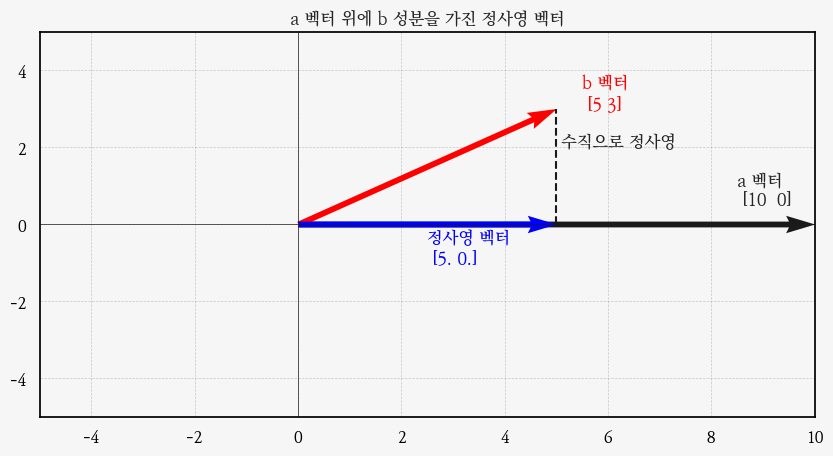

In [32]:
fig,ax = plt.subplots(figsize = (10,5))
ax.set_xlim([-5,10])
ax.set_ylim([-5,5])

ax.plot([-5,10],[0,0], c = 'k', lw = 0.5)
ax.plot([0,0],[5,-5], c = 'k', lw = 0.5)

ax.quiver(0,0,A[0],A[1], scale = 1, angles = 'xy', scale_units = 'xy')
ax.text(A[0] - 1.5,A[1] + 0.5, f'a 벡터\n {A}')
ax.quiver(0,0,b[0],b[1], scale = 1, angles = 'xy', scale_units = 'xy', color = 'red')
ax.text(b[0] + 0.5,b[1] , f'b 벡터 \n {b}', c = 'red')

ax.plot([5,5],[0,3], ls = '--', c = 'k')
ax.text(5,2,' 수직으로 정사영')

a_dot_b = A@b / np.linalg.norm(A)
unit_a = A / np.linalg.norm(A)

proj_a_b = a_dot_b * unit_a
proj_a_b

ax.quiver(0,0,proj_a_b[0],proj_a_b[1], scale = 1, scale_units = 'xy', color = 'blue')
ax.text(2.5,-1, f'정사영 벡터 \n {proj_a_b}', c = 'blue')

ax.set_title('a 벡터 위에 b 성분을 가진 정사영 벡터')

Text(0.5, 1.0, '정사영 시킨 벡터와 정사영 벡터의 차는 정규 법선 벡터 생성')

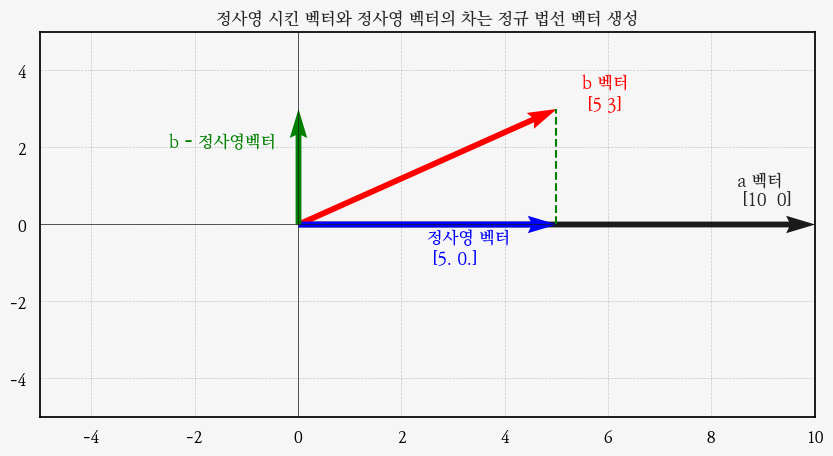

In [47]:
fig,ax = plt.subplots(figsize = (10,5))
ax.set_xlim([-5,10])
ax.set_ylim([-5,5])

ax.plot([-5,10],[0,0], c = 'k', lw = 0.5)
ax.plot([0,0],[5,-5], c = 'k', lw = 0.5)

ax.quiver(0,0,A[0],A[1], scale = 1, angles = 'xy', scale_units = 'xy')
ax.text(A[0] - 1.5,A[1] + 0.5, f'a 벡터\n {A}')
ax.quiver(0,0,b[0],b[1], scale = 1, angles = 'xy', scale_units = 'xy', color = 'red')
ax.text(b[0] + 0.5,b[1] , f'b 벡터 \n {b}', c = 'red')

e = b - proj_a_b

ax.plot([5,5],[0,3], ls = '--', c = 'green')

ax.quiver(0,0,proj_a_b[0],proj_a_b[1], scale = 1, scale_units = 'xy', color = 'blue')
ax.text(2.5,-1, f'정사영 벡터 \n {proj_a_b}', c = 'blue')

ax.quiver(0,0,e[0],e[1], scale = 1, angles = 'xy', scale_units = 'xy', color = 'green')
ax.text(-2.5,2, 'b - 정사영벡터', color = 'green')

ax.set_title('정사영 시킨 벡터와 정사영 벡터의 차는 정규 법선 벡터 생성')

In [8]:

A = np.array([
    [1,4,5,6,9],
    [3,-2,1,4,-1],
    [-1,0,-1,-2,-1],
    [2,3,5,7,8]
]
)

A

array([[ 1,  4,  5,  6,  9],
       [ 3, -2,  1,  4, -1],
       [-1,  0, -1, -2, -1],
       [ 2,  3,  5,  7,  8]])

**A 에 대한 행공간 및 열공간 위로의 정사영에 대한 표준 행렬 찾기**

In [3]:
import sympy as sp

A_sp = sp.Matrix(A.tolist())

A_sp

Matrix([
[ 1,  4,  5,  6,  9],
[ 3, -2,  1,  4, -1],
[-1,  0, -1, -2, -1],
[ 2,  3,  5,  7,  8]])

In [4]:
A_rref, A_pivot = A_sp.rref()

print('RREF는') # RREF 를 통해 기저 행렬 찾기 
display(A_rref)

RREF는


Matrix([
[1, 0, 1, 2, 1],
[0, 1, 1, 1, 2],
[0, 0, 0, 0, 0],
[0, 0, 0, 0, 0]])

### **RREF로 기저 벡터를 찾는 이유**
* 나는 A 행렬이 span 하는 영역에 정사영 하는 벡터를 알고 싶기에 A의 부분공간의 기저 벡터들만 신경 쓰기로 함 
* A 행렬에 정사영 시킨 벡터는  A의 기저벡터들의 선형 결합으로 만들어진 벡터이기 때문이다.

In [5]:
col_basis = A_sp[:,:2]
row_basis = A_sp.T[:,:2]

print('열 기저 벡터행렬은')
display(col_basis)

print('행 기저 벡터 행렬은')
display(row_basis)

열 기저 벡터행렬은


Matrix([
[ 1,  4],
[ 3, -2],
[-1,  0],
[ 2,  3]])

행 기저 벡터 행렬은


Matrix([
[1,  3],
[4, -2],
[5,  1],
[6,  4],
[9, -1]])

In [6]:
def projection_matrix(m):
    
    inv_ = (m.T@m).inv()
    
    return m@inv_@m.T

In [7]:
print('열 공간으로의 정사영 행렬은')
display(projection_matrix(col_basis))

print('행 공간으로의 정사영 행렬은')
display(projection_matrix(row_basis))

열 공간으로의 정사영 행렬은


Matrix([
[237/419, -73/419, -13/419, 194/419],
[-73/419, 369/419, -95/419,  64/419],
[-13/419, -95/419,  29/419, -46/419],
[194/419,  64/419, -46/419, 203/419]])

행 공간으로의 정사영 행렬은


Matrix([
[ 7/24, -5/24, 1/12,  3/8, -1/8],
[-5/24,  7/24, 1/12, -1/8,  3/8],
[ 1/12,  1/12,  1/6,  1/4,  1/4],
[  3/8,  -1/8,  1/4,  5/8,  1/8],
[ -1/8,   3/8,  1/4,  1/8,  5/8]])